In [ ]:
# system
import os, sys, glob, re, itertools, collections, requests
import multiprocessing # parallelise list comprehensions
from pathlib import Path

# filler to import personal library
# sys.path.append('/home/alal/Desktop/code/py_libraries/')

# pyscience imports
import numpy as np
import pandas as pd
import janitor
import pandas_flavor as pf
import statsmodels.api as sm
import statsmodels.formula.api as smf

# viz
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
sns.set(style="ticks", context="talk")
font = {'family' : 'IBM Plex Sans',
               'weight' : 'normal',
               'size'   : 10}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = (10, 10)
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# geodata packages
import geopandas as gpd
import geoplot as gplt
import contextily as cx
# raster packages
# import rasterio as rio
# from rasterstats import zonal_stats

# show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ingest

## Spatial

In [2]:
root = Path('/home/alal/Dropbox/1_Research/LongSHOT')
inp = root/'input'
tmp = root/'tmp'

In [3]:
lea = (gpd.read_file(inp/"Local_Law_Enforcement_Locations/Local_Law_Enforcement.shp")
       .clean_names()
       .infer_objects())
lea.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fid         23486 non-null  int64   
 1   id          23486 non-null  int64   
 2   name        23486 non-null  object  
 3   address     23486 non-null  object  
 4   city        23486 non-null  object  
 5   state       23486 non-null  object  
 6   zip         23486 non-null  object  
 7   zip4        23486 non-null  object  
 8   telephone   23486 non-null  object  
 9   type        23486 non-null  object  
 10  status      23486 non-null  object  
 11  population  23486 non-null  int64   
 12  county      23486 non-null  object  
 13  countyfips  23486 non-null  object  
 14  country     23486 non-null  object  
 15  latitude    23486 non-null  float64 
 16  longitude   23486 non-null  float64 
 17  naics_code  23486 non-null  object  
 18  naics_desc  23486 non-null  object  
 

## Clean

In [4]:
lea_ca = lea.query("state == 'CA'")

In [5]:
lea.shape
lea_ca.shape

(23486, 37)

(1013, 37)

In [6]:
place = (gpd.read_file(inp/'tl_2019_06_place/tl_2019_06_place.shp')
        .clean_names()
        .infer_objects())
place.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   statefp   1521 non-null   object  
 1   placefp   1521 non-null   object  
 2   placens   1521 non-null   object  
 3   geoid     1521 non-null   object  
 4   name      1521 non-null   object  
 5   namelsad  1521 non-null   object  
 6   lsad      1521 non-null   object  
 7   classfp   1521 non-null   object  
 8   pcicbsa   1521 non-null   object  
 9   pcinecta  1521 non-null   object  
 10  mtfcc     1521 non-null   object  
 11  funcstat  1521 non-null   object  
 12  aland     1521 non-null   int64   
 13  awater    1521 non-null   int64   
 14  intptlat  1521 non-null   object  
 15  intptlon  1521 non-null   object  
 16  geometry  1521 non-null   geometry
dtypes: geometry(1), int64(2), object(14)
memory usage: 202.1+ KB


In [7]:
place.crs
lea.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Reproject

In [9]:
lea_ca = lea_ca.to_crs("EPSG:4326")
place = place.to_crs("EPSG:4326")

## Preliminary map

Text(0.5, 1, 'CA LEAs and Census Places')

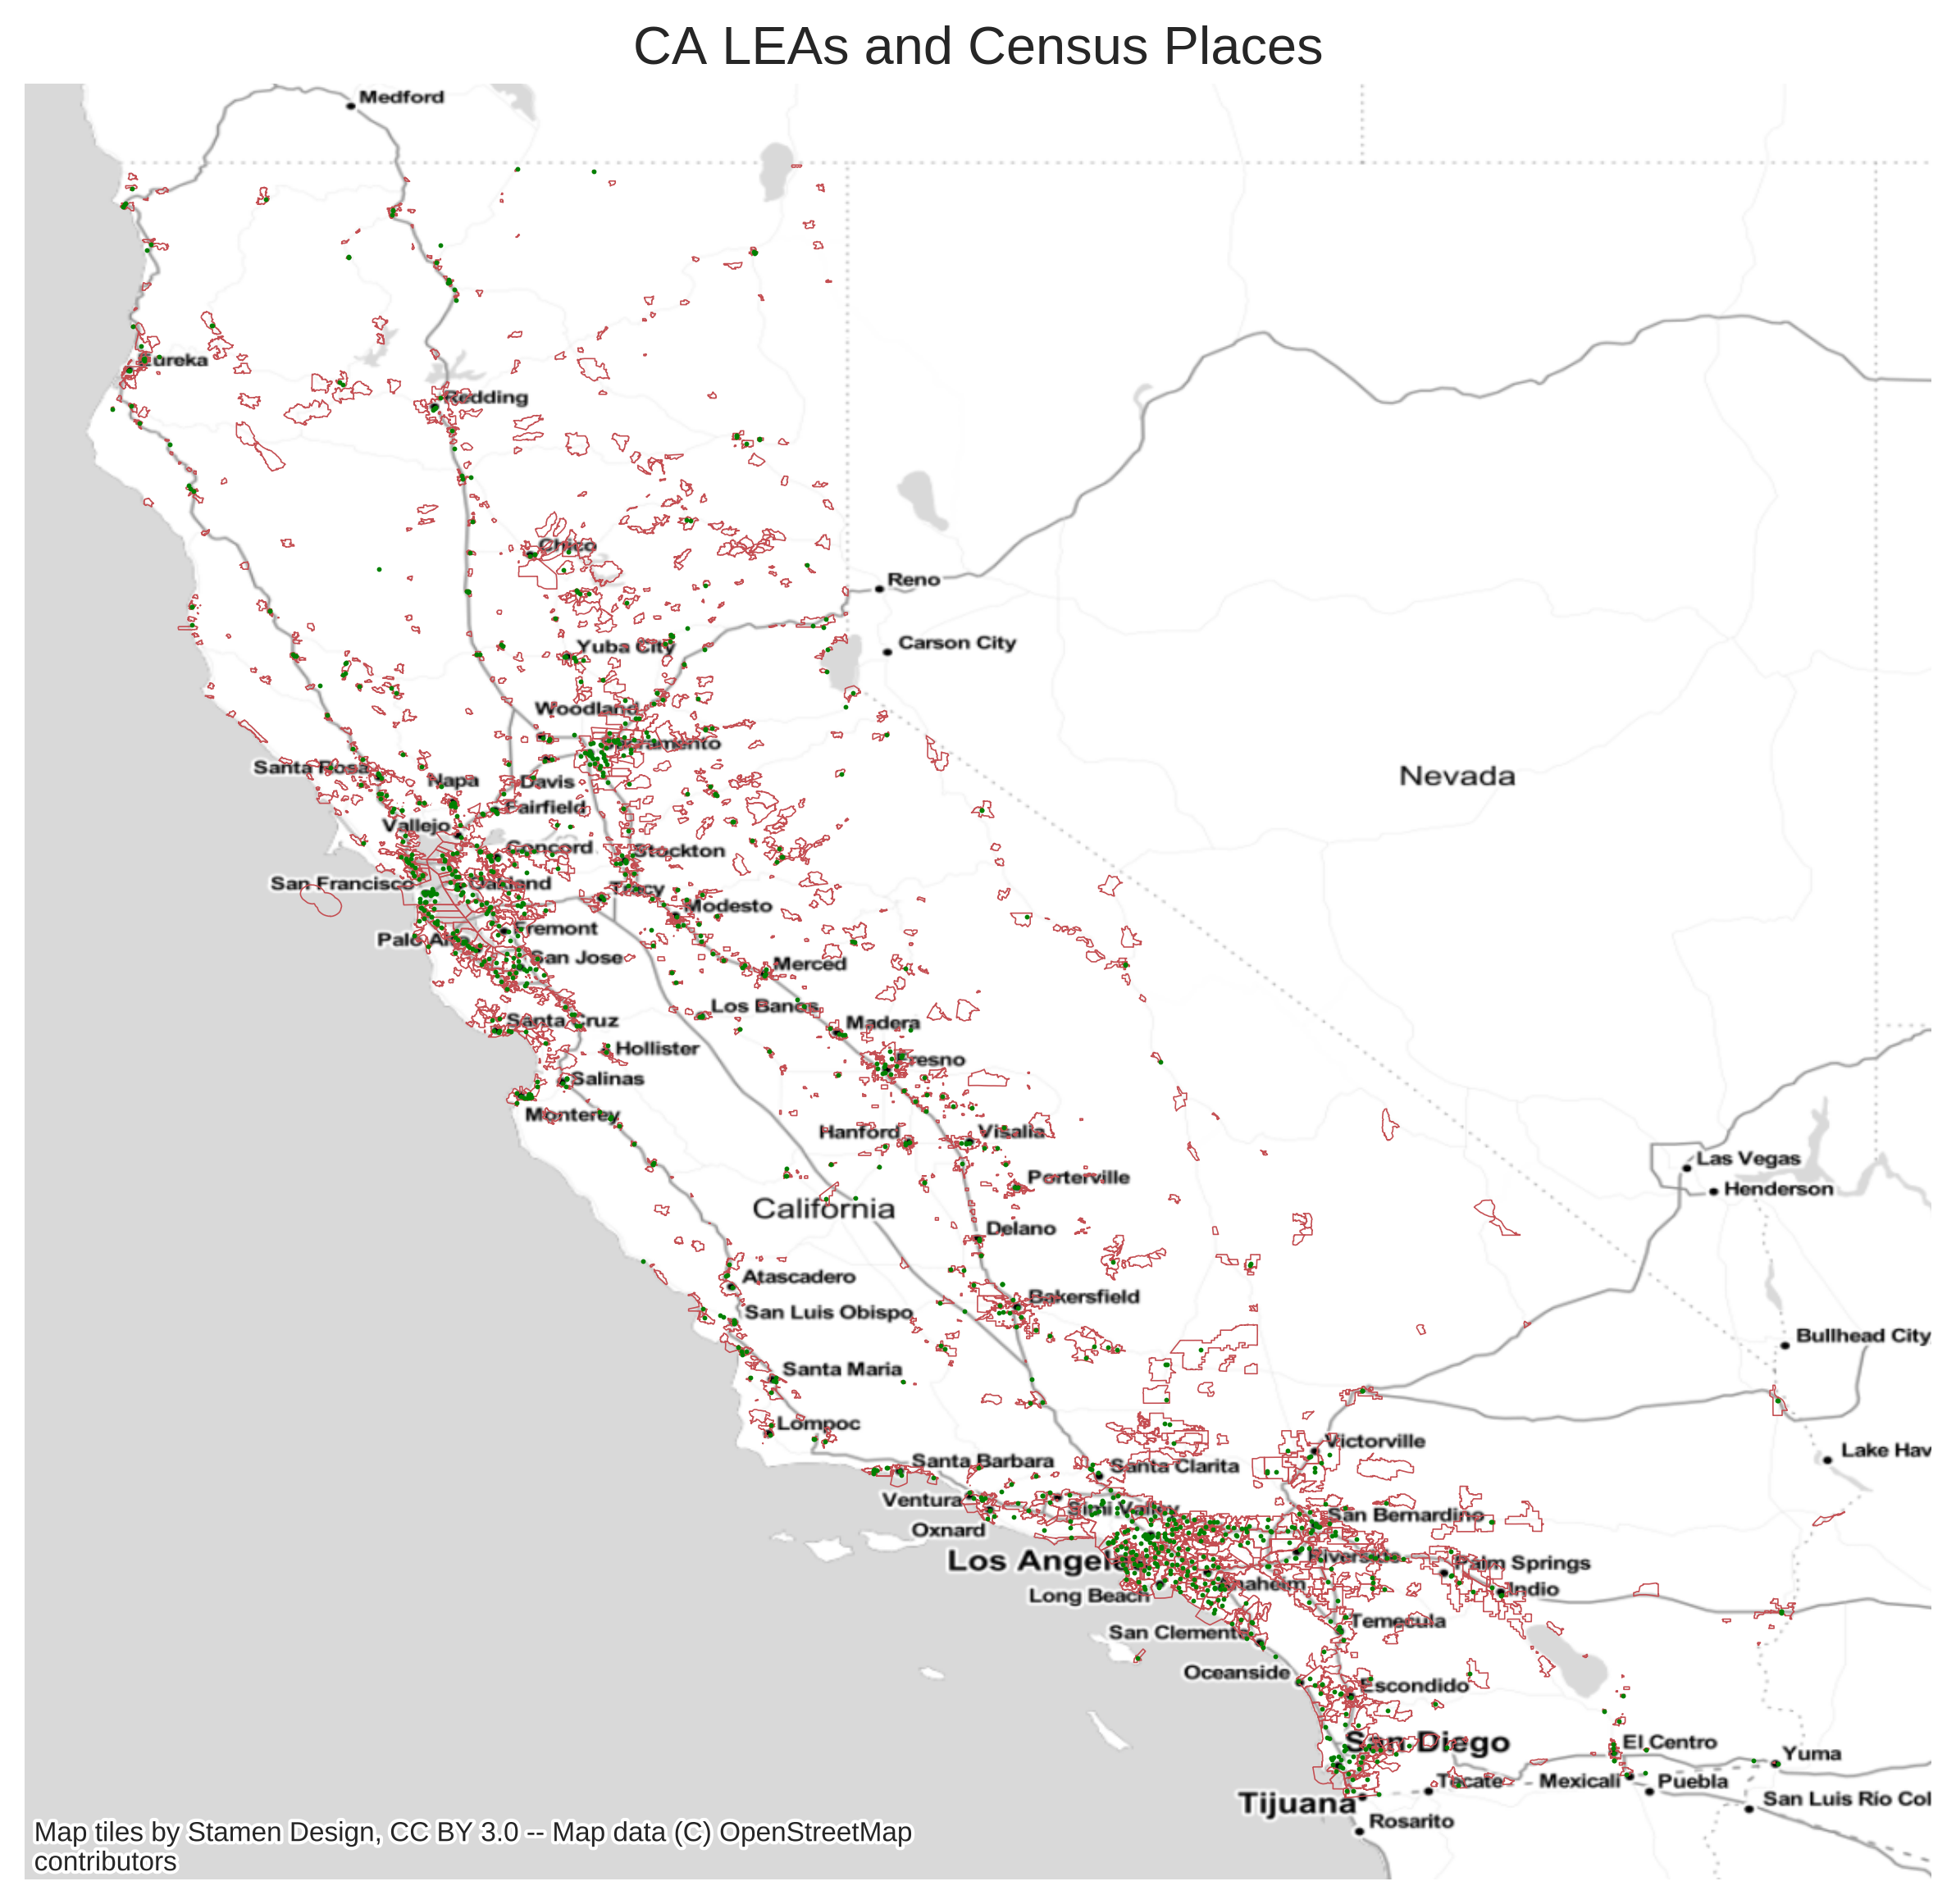

In [13]:
f, ax = plt.subplots(figsize = (10, 12), dpi = 150)
place.plot(facecolor = 'None', edgecolor = 'r', ax = ax)
lea_ca.plot(ax = ax, facecolor = 'green', markersize = 1)
cx.add_basemap(ax, crs = place.crs.to_string(),
               source = cx.providers.Stamen.TonerLite)
ax.set_title("CA LEAs and Census Places")
ax.set_axis_off()

## spatial merge 

In [ ]:
merged = gpd.sjoin()